In [1]:
#First, import all the necessary libraries into our notebook. LibROSA and SciPy are the Python libraries used for 
# processing audio signals.
import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('XFull_MNIST.csv')
dataset.head()


,1,2,3,4,5,6,7,8,9,10,...,1852,1853,1854,1855,1856,1857,1858,1859,1860,Label
0,-1.18590,-1.10830,-1.11820,-1.04960,-0.93815,-0.91968,-0.87015,-0.85862,-1.03370,-0.86543,...,1.0733,1.0733,1.0733,1.0733,1.0733,1.0733,1.0733,1.0733,1.0733,5
1,-0.93631,-0.93671,-0.93733,-0.93070,-0.93799,-0.71342,-0.85749,-0.74200,-0.91414,-0.92814,...,1.3426,1.3426,1.3426,1.3426,1.3426,1.3426,1.3426,1.3426,1.3426,3
2,-1.13300,-1.05840,-0.98421,-0.92401,-0.91099,-0.74576,-0.84772,-0.91078,-0.95023,-0.72987,...,1.1248,1.1248,1.1248,1.1248,1.1248,1.1248,1.1248,1.1248,1.1248,5
3,-0.94675,-0.95208,-0.96140,-0.96423,-0.95421,-0.85394,-0.74343,-0.70551,-0.67064,-0.65352,...,1.4082,1.4082,1.4082,1.4082,1.4082,1.4082,1.4082,1.4082,1.4082,9
4,-1.03790,-1.04600,-1.04360,-1.04210,-1.01870,-0.66626,-0.71154,-0.90012,-0.87997,-0.76461,...,1.1820,1.1820,1.1820,1.1820,1.1820,1.1820,1.1820,1.1820,1.1820,3


In [3]:
X = dataset.iloc[:, 0:1860].values
X.shape

(30000, 1860)

In [4]:
y = dataset.iloc[:,1860].values
y.shape

(30000,)

In [5]:
import statistics
import time
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [6]:
#Convert the output labels to integer encoded:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)
classes= list(le.classes_)

In [7]:
#Now, convert the integer encoded labels to a one-hot vector since it is a multi-classification problem:
train_audio_path = './MNIST_Numbers'  
labels=os.listdir(train_audio_path)
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

In [8]:
all_wave = np.array(X).reshape(-1,1860,1)
all_wave.shape
#len(all_wave[0]

(30000, 1860, 1)

In [9]:
#Split into train and validation set
#Next, we will train the model on 80% of the data and validate on the remaining 20%:
import statistics
import time
from sklearn.model_selection import train_test_split
#start_train= time.time()
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)
#end_train = time.time()
#print(f"Train_time: {end_train-start_train}")

In [10]:
#Model Architecture for this problem
#We will build the speech-to-text model using conv1d. Conv1d is a convolutional neural network which performs the convolution along only one dimension. 
# https://www.analyticsvidhya.com/blog/2019/07/learn-build-first-speech-to-text-model-python/
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(1860,1))

#First Conv1D layer
conv = Conv1D(8,15, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 13, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fifth Conv1D layer
#conv = Conv1D(128, 3, padding='valid', activation='relu', strides=1)(conv)
#conv = MaxPooling1D(3)(conv)
#conv = Dropout(0.3)(conv)
#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(64, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1860, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 1846, 8)           128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 615, 8)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 615, 8)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 603, 16)           1680      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 201, 16)          0         
 1D)                                                         

In [11]:
#Define the loss function to be categorical cross-entropy since it is a multi-classification problem:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
#Early stopping and model checkpoints are the callbacks to stop training the neural network at the right time and 
# to save the best model after every epoch:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [13]:
# Let us train the model on a batch size of 32 and evaluate the performance on the holdout set:
start_train= time.time()
history=model.fit(x_tr, y_tr ,epochs=50, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))
end_train = time.time()
print(f"Train_time: {end_train-start_train}")

Epoch 1/50
750/750 [==============================] - 40s 43ms/step - loss: 1.3201 - accuracy: 0.5177 - val_loss: 0.2287 - val_accuracy: 0.9343
Epoch 2/50
750/750 [==============================] - 34s 45ms/step - loss: 0.3535 - accuracy: 0.8880 - val_loss: 0.0879 - val_accuracy: 0.9763
Epoch 3/50
750/750 [==============================] - 36s 48ms/step - loss: 0.2306 - accuracy: 0.9302 - val_loss: 0.0515 - val_accuracy: 0.9862
Epoch 4/50
750/750 [==============================] - 33s 43ms/step - loss: 0.1696 - accuracy: 0.9483 - val_loss: 0.0408 - val_accuracy: 0.9907
Epoch 5/50
750/750 [==============================] - 34s 45ms/step - loss: 0.1521 - accuracy: 0.9561 - val_loss: 0.0332 - val_accuracy: 0.9912
Epoch 6/50
750/750 [==============================] - 34s 45ms/step - loss: 0.1307 - accuracy: 0.9607 - val_loss: 0.0316 - val_accuracy: 0.9905
Epoch 7/50
750/750 [==============================] - 32s 43ms/step - loss: 0.1162 - accuracy: 0.9656 - val_loss: 0.0282 - val_accuracy:

Epoch 27: early stopping
Train_time: 904.322286605835


In [15]:
import pickle
import sys

p = pickle.dumps(model)
print(sys.getsizeof(p)/1024) #KB

INFO:tensorflow:Assets written to: ram://0ec1d958-a25f-4c8a-a74e-2198b19f334f/assets


INFO:tensorflow:Assets written to: ram://0ec1d958-a25f-4c8a-a74e-2198b19f334f/assets


340.2568359375


In [16]:
model.save('best_model_mnist_full.hdf5')

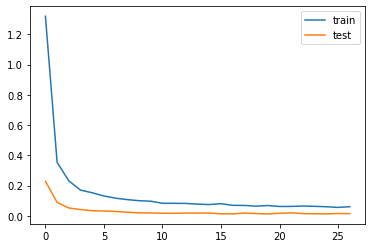

In [17]:
#I’m going to lean on visualization again to understand the performance of the model over a period of time:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()

In [18]:
#Loading the best model
from keras.models import load_model
model=load_model('best_model_mnist_full.hdf5')

In [37]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_val, y_val, batch_size=8)  #saved_model
print("test loss, test acc:", results)

Evaluate on test data
750/750 [==============================] - 4s 5ms/step - loss: 0.0140 - accuracy: 0.9962
test loss, test acc: [0.014025970362126827, 0.9961666464805603]


In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

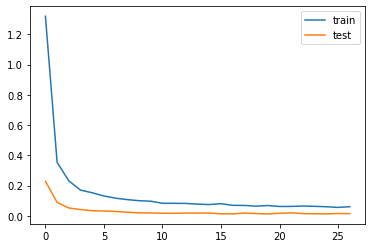

In [39]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

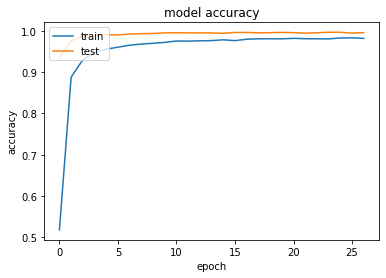

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
import tensorflow as tf
y_predict=model.predict(x_val)
conf_mat=tf.math.confusion_matrix(np.argmax(y_val,axis=1) , np.argmax(y_predict,axis=1))

188/188 [==============================] - 2s 10ms/step


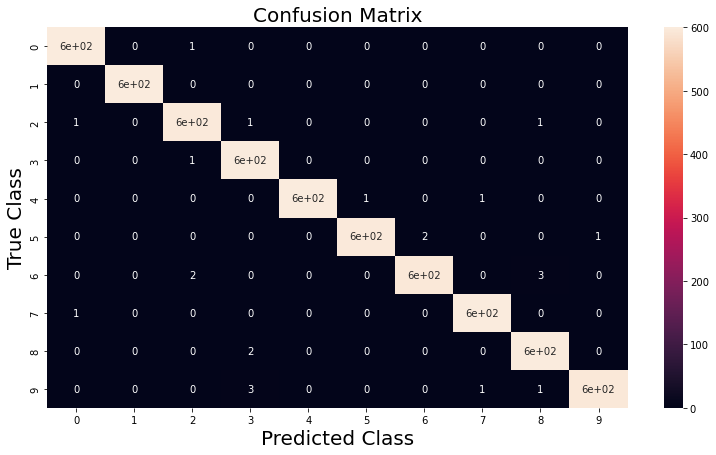

In [42]:
import seaborn as sn
import pandas as pd
df_cm = pd.DataFrame(np.array(conf_mat), index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure(figsize = (13,7))
ax = sn.heatmap(df_cm, annot=True)
plt.title("Confusion Matrix", fontsize=20)
plt.ylabel("True Class"     , fontsize=20)
plt.xlabel("Predicted Class", fontsize=20)
plt.show()

In [43]:
predicted_classes=model.predict(x_val)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes
y_val = np.argmax(np.round(y_val),axis=1)

188/188 [==============================] - 2s 10ms/step


In [44]:
predicted_classes.shape, y_val.shape
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_val, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.99      1.00      0.99       600
     Class 1       1.00      1.00      1.00       600
     Class 2       0.99      0.99      0.99       600
     Class 3       0.99      1.00      0.99       600
     Class 4       1.00      1.00      1.00       600
     Class 5       1.00      0.99      1.00       600
     Class 6       1.00      0.99      0.99       600
     Class 7       1.00      1.00      1.00       600
     Class 8       0.99      1.00      1.00       600
     Class 9       1.00      0.99      0.99       600

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predicted_classes, y_val)

array([[599,   1,   2,   0,   1,   0,   1,   1,   0,   1],
       [  0, 599,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0, 597,   1,   0,   0,   1,   0,   0,   0],
       [  0,   0,   1, 599,   0,   0,   0,   0,   2,   3],
       [  0,   0,   0,   0, 598,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 597,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   2, 595,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0, 599,   0,   1],
       [  0,   0,   0,   0,   0,   0,   3,   0, 598,   1],
       [  0,   0,   0,   0,   0,   1,   0,   0,   0, 594]], dtype=int64)